# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [ ]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data = df_data[["S", "EXP", "EARNINGS"]]
df_data.shape

(2000, 3)

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [ ]:
print(f"Missing values:{df_data.isna().values.any()}")
print(f"Duplicades:{df_data.duplicated().values.any()} ")

df_data.duplicated().sum()

Missing values:False
Duplicades:True 


514

In [ ]:
df_data.drop_duplicates(inplace=True)
print(df_data.shape)
print(f"Duplicades:{df_data.duplicated().values.any()}")

(1486, 3)
Duplicades:False


## Descriptive Statistics

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 0 to 1995
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S         1486 non-null   int64  
 1   EXP       1486 non-null   float64
 2   EARNINGS  1486 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 46.4 KB


In [ ]:
df_data.describe()

,S,EXP,EARNINGS
count,"1,486.00","1,486.00","1,486.00"
mean,14.56,6.70,18.81
std,2.77,2.86,12.00
min,6.00,0.00,2.00
25%,12.00,4.66,11.41
50%,15.00,6.63,15.75
75%,16.00,8.71,22.60
max,20.00,14.73,132.89


## Visualise the Features

In [ ]:
df_data.head(10)

,S,EXP,EARNINGS
0,12,9.71,18.50
1,17,5.71,19.23
2,14,9.94,39.05
3,18,1.54,16.80
4,15,2.94,36.06
5,12,8.02,13.14
6,13,9.79,10.00
7,14,7.71,12.79
8,14,6.85,20.19
9,17,7.15,25.48


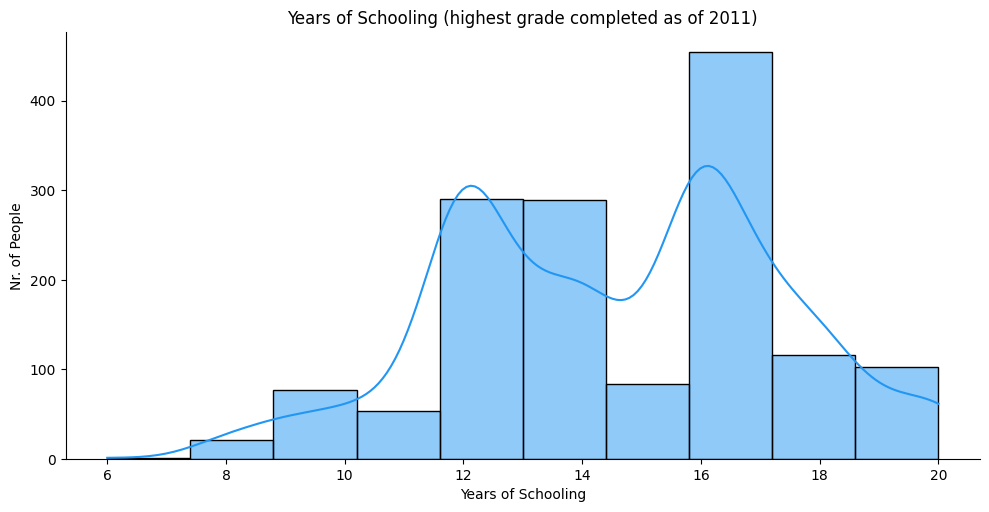

In [ ]:
sns.displot(df_data['S'], 
            bins=10, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'Years of Schooling (highest grade completed as of 2011)')
plt.xlabel('Years of Schooling')
plt.ylabel('Nr. of People')

plt.show()

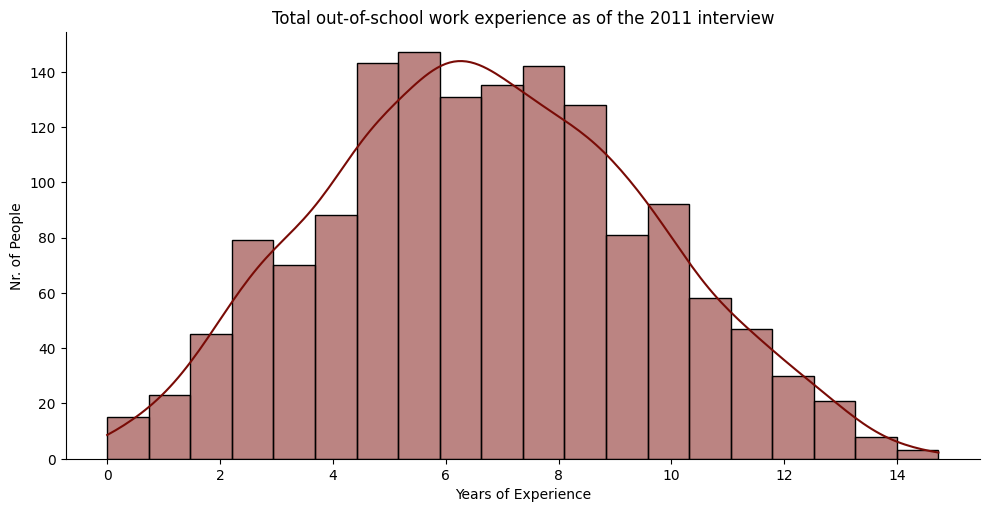

In [ ]:
sns.displot(df_data['EXP'], 
            bins=20, 
            aspect=2,
            kde=True, 
            color='#790B06')

plt.title(f'Total out-of-school work experience as of the 2011 interview')
plt.xlabel('Years of Experience')
plt.ylabel('Nr. of People')

plt.show()

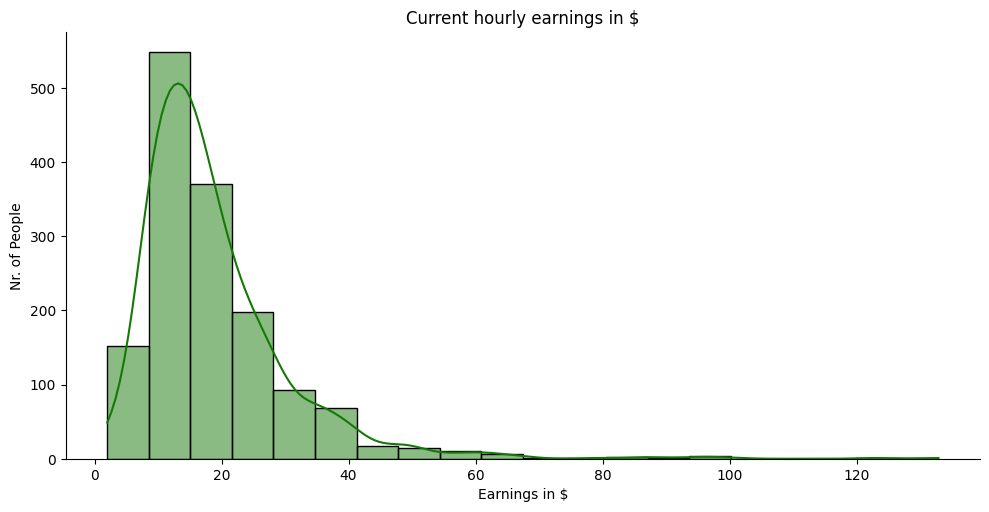

In [ ]:
sns.displot(df_data['EARNINGS'], 
            bins=20, 
            aspect=2,
            kde=True, 
            color='#147906')

plt.title(f'Current hourly earnings in $')
plt.xlabel('Earnings in $')
plt.ylabel('Nr. of People')

plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [ ]:
X = df_data[["S", "EXP"]]
y = df_data[["EARNINGS"]]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=10)


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train[["S"]], y_train)
R2 = lin_reg.score(X_train[["S"]], y_train)
print(f"R2:{R2}")

R2:0.08351280504861702


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [ ]:
coef = lin_reg.coef_
print(f"Year of schooling coef: {coef}")

Year of schooling coef: [[1.25010553]]


In [ ]:
print("The expect increase in dollars is 1.25*(Years of Schooling)")

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [ ]:
y_hat = lin_reg.predict(X_train[["S"]])
residuals = (y_train - y_hat)

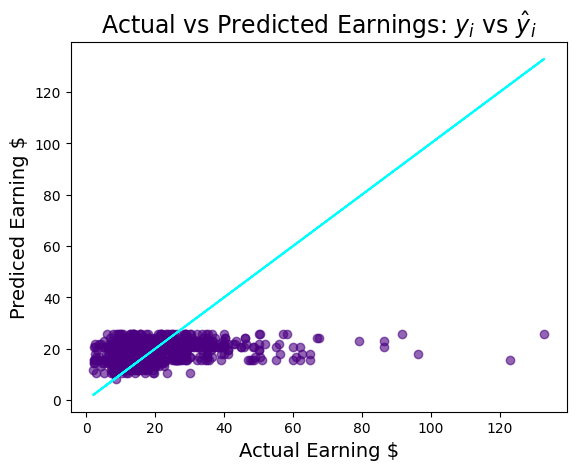

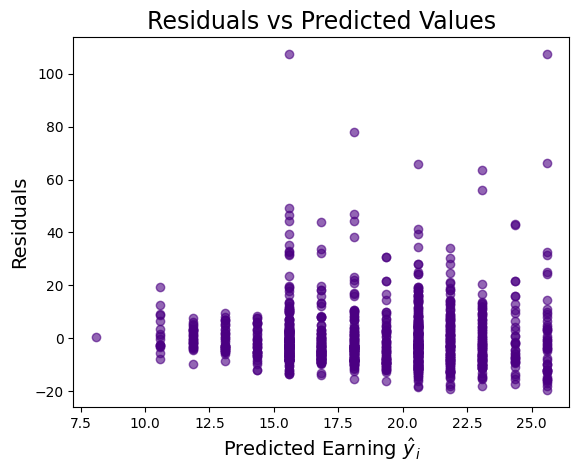

In [ ]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=y_hat, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earning $', fontsize=14)
plt.ylabel('Prediced Earning $', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=y_hat, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earning $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

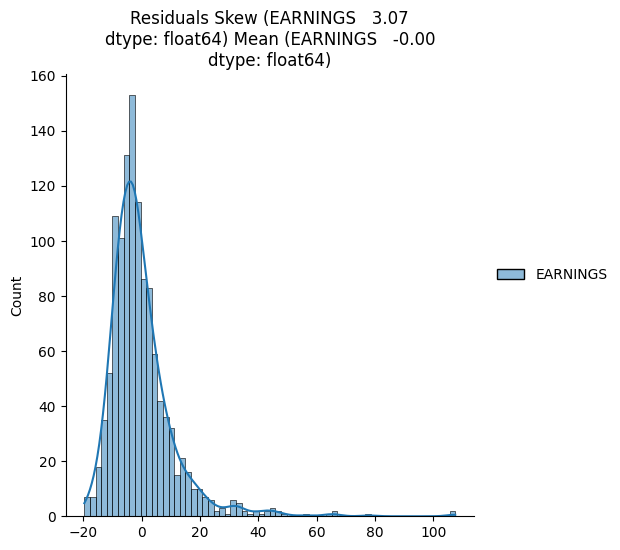

In [ ]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='#4f045c')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

There is clearly a pattern in the distribuiton of the residuals.

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [ ]:
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
multi_R2 = multi_reg.score(X_train, y_train)
print(f"R2:{multi_R2}")

R2:0.11773387726114526


### Evaluate the Coefficients of the Model

In [ ]:
multi_reg.coef_

array([[1.81594235, 0.95875471]])

### Analyse the Estimated Values & Regression Residuals

In [ ]:
y_hat = multi_reg.predict(X_train)
residuals = (y_train - y_hat)

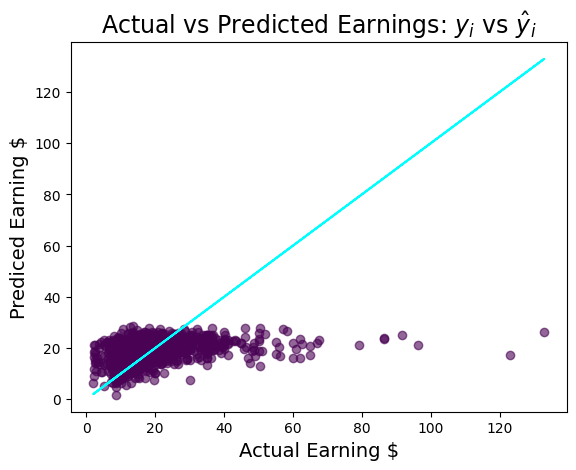

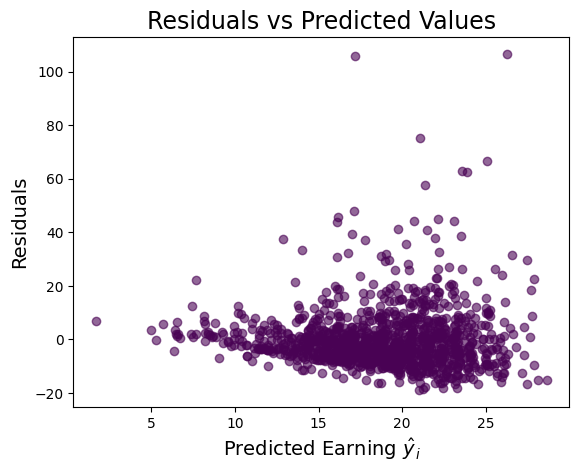

In [ ]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=y_hat, c='#490254', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earning $', fontsize=14)
plt.ylabel('Prediced Earning $', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=y_hat, y=residuals, c='#490254', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earning $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

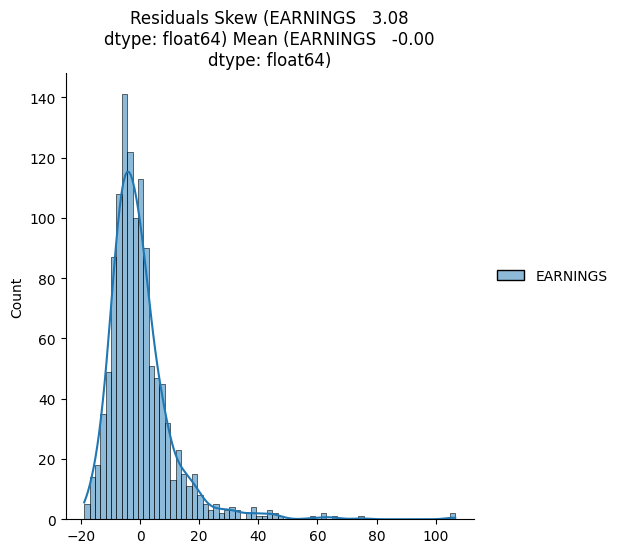

In [ ]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='#4f045c')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [ ]:
year_s = 16
year_w = 5
pred = multi_reg.intercept_ + multi_reg.coef_[0][0]*year_s + multi_reg.coef_[0][1]*year_w

print(f'The expected amount with 16 years of schooling and 5 years of work exp is ${pred[0]:.3}/ hour.')

The expected amount with 16 years of schooling and 5 years of work exp is $19.8/ hour
